### create directory for each tool

In [1]:
!mkdir adapter_removal cutadapt porifera skewer trimmomatic

### demultiplex and trim all reads (so forward barcodes don't influence expected read lengths)

In [2]:
!mkdir demultiplexed
!ln -fs ../../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/simulated_R1.fastq ./demultiplexed/
!ln -fs ../../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/simulated_R2.fastq ./demultiplexed/
!ln -fs ../../../../resources/barcodes/miseq_barcodes/mwanga_barcodes_combined.txt ./demultiplexed/

In [3]:
!time python3 /Users/ryankuster/github/ngscomposer/tools/anemone.py -f 6 -r1 ./demultiplexed/simulated_R1.fastq -r2 ./demultiplexed/simulated_R2.fastq -m 1 -c ./demultiplexed/mwanga_barcodes_combined.txt -o ./demultiplexed/

redundant R1 barcodes detected
redundant R2 barcodes detected
python3 /Users/ryankuster/github/ngscomposer/tools/anemone.py -f 6 -r1  -r2    44.28s user 17.97s system 80% cpu 1:17.05 total


### run trimmomatic (version 0.39)  
Trimmomatic was not included in the final analyses because there was no way to control for the minimum read length called as an adapter (12bp here). The simple adapter clip variable was set to 12 in these steps, which produce results that do not fairly represent Trimmmomatic's capabilities.

In [4]:
!gzip -k ./demultiplexed/combined.R1.fastq
!ln -fs ../demultiplexed/combined.R1.fastq.gz ./trimmomatic/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/trimmomatic_adapters.R1.fasta ./trimmomatic/

!head -n 5 ./trimmomatic/trimmomatic_adapters.R1.fasta


In [5]:
!time java -jar ~/tools/adapter_trimming/Trimmomatic-0.39/trimmomatic-0.39.jar SE -threads 1 -phred33 \
./trimmomatic/combined.R1.fastq.gz ./trimmomatic/trimmomatic_combined.R1.fastq.gz \
ILLUMINACLIP:./trimmomatic/trimmomatic_adapters.R1.fasta:2:0:12 MINLEN:0

TrimmomaticSE: Started with arguments:
 -threads 1 -phred33 ./trimmomatic/combined.R1.fastq.gz ./trimmomatic/trimmomatic_combined.R1.fastq.gz ILLUMINACLIP:./trimmomatic/trimmomatic_adapters.R1.fasta:2:0:12 MINLEN:0
Using Long Clipping Sequence: 'ATGAGATGAGGCGATTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'CTCCTGGACTAAGGAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'GCAGCTTACAGCTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'ATCTACGCTTCTAGGTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'CTCTCGAATGTGACAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'ATTGGCATCAGGTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'CTACCACCTAACCGAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'GAGGAAGGACTTCCAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'GTCTATGCACCGTTGAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
Using Long Clipping Sequence: 'ATGTGCCGATGATGGAAGATC

In [6]:
!gunzip ./trimmomatic/trimmomatic_combined.R1.fastq.gz

In [7]:
!python3 ../scripts/check_simulated_lengths.py ./trimmomatic/trimmomatic_combined.R1.fastq ./demultiplexed/combined.R1.fastq 8 trimmomatic_R1


all reads:
count    952102.000000
mean          0.411667
std           3.437335
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         223.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    716382
1    235720
Name: contaminated, dtype: int64

reads containing missed adapters:
0    896270
1     55832
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    842134
1    109968
Name: false_id, dtype: int64

misidentified reads:
count    165800.000000
mean          2.363987
std           7.951977
min          -3.000000
25%          -2.000000
50%          -1.000000
75%           5.000000
max         223.000000
Name: o_minus_e, dtype: float64


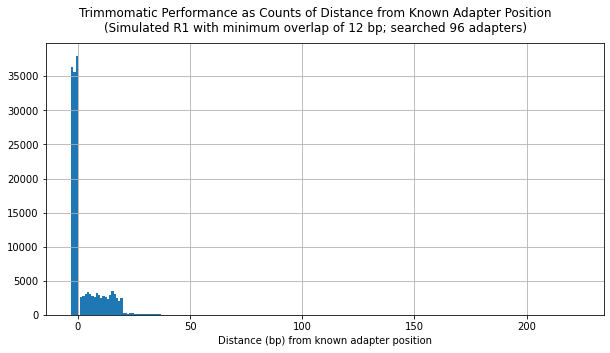

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('trimmomatic_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Trimmomatic Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('trimmomatic_R1_misses.pdf')

In [9]:
!gzip -k ./demultiplexed/combined.R2.fastq
!ln -fs ../demultiplexed/combined.R2.fastq.gz ./trimmomatic/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/trimmomatic_adapters.R2.fasta ./trimmomatic/

!head -n 5 ./trimmomatic/trimmomatic_adapters.R2.fasta


In [10]:
!time java -jar ~/tools/adapter_trimming/Trimmomatic-0.39/trimmomatic-0.39.jar SE -threads 1 -phred33 \
./trimmomatic/combined.R2.fastq.gz ./trimmomatic/trimmomatic_combined.R2.fastq.gz \
ILLUMINACLIP:./trimmomatic/trimmomatic_adapters.R2.fasta:2:0:12 MINLEN:0
                        

TrimmomaticSE: Started with arguments:
 -threads 1 -phred33 ./trimmomatic/combined.R2.fastq.gz ./trimmomatic/trimmomatic_combined.R2.fastq.gz ILLUMINACLIP:./trimmomatic/trimmomatic_adapters.R2.fasta:2:0:12 MINLEN:0
Using Long Clipping Sequence: 'GAATTCCAAGCCAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'CTAACTGCCTCAGAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'GTCTGAACTACACACAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'CTTGATCCGTCTTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'CGTTCTCCTGTGGTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'GGCGTTATCCAGAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'CTATGGAGAACGAGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'GTATGGCGTTCACTCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'ATTCAATGTGTTGGACAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
Using Long Clipping Sequence: 'CCAAGACTACGTGAGATCGGAAGAGCGTCGTGT

In [11]:
!gunzip ./trimmomatic/trimmomatic_combined.R2.fastq.gz

In [12]:
!python3 ../scripts/check_simulated_lengths.py ./trimmomatic/trimmomatic_combined.R2.fastq ./demultiplexed/combined.R2.fastq 8 trimmomatic_R2


all reads:
count    952102.000000
mean          0.481443
std           3.990065
min          -3.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         222.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    715819
1    236283
Name: contaminated, dtype: int64

reads containing missed adapters:
0    895056
1     57046
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    844317
1    107785
Name: false_id, dtype: int64

misidentified reads:
count    164831.000000
mean          2.780927
std           9.250237
min          -3.000000
25%          -2.000000
50%          -1.000000
75%           6.000000
max         222.000000
Name: o_minus_e, dtype: float64


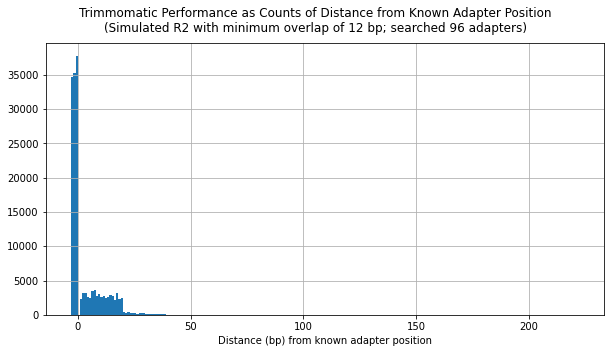

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('trimmomatic_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Trimmomatic Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('trimmomatic_R2_misses.pdf')

### run porifera (version 0.4.7 commit 'b1ce4a2')

In [14]:
!ln -fs ../demultiplexed/combined.R1.fastq ./porifera
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/adapters.R1.txt ./porifera/

!head -n 5 ./porifera/adapters.R1.txt

GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTGTTGTGAACAACC
GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTGCCATTAACTGTG
GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTAGCTGTAAGCTGC
GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTTTCGAGAAGGTCG
GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTAGGAGTAATCAGG


In [15]:
!time python3 /Users/ryankuster/github/ngscomposer/tools/porifera.py -r1 ./porifera/combined.R1.fastq -a1 ./porifera/adapters.R1.txt -m 12 -l 0 -o ./porifera/ -m1 CATG


python3 /Users/ryankuster/github/ngscomposer/tools/porifera.py -r1  -a1  -m 1  273.33s user 1.72s system 99% cpu 4:35.94 total


In [16]:
!python3 ../scripts/check_simulated_lengths.py ./porifera/adapted.combined.R1.fastq ./demultiplexed/combined.R1.fastq 8 porifera_R1

all reads:
count    952102.000000
mean          0.367247
std           4.276493
min        -231.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         228.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    716382
1    235720
Name: contaminated, dtype: int64

reads containing missed adapters:
0    916309
1     35793
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952039
1        63
Name: false_id, dtype: int64

misidentified reads:
count    35856.000000
mean         9.751701
std         19.852376
min       -231.000000
25%          4.000000
50%          7.000000
75%         10.000000
max        228.000000
Name: o_minus_e, dtype: float64


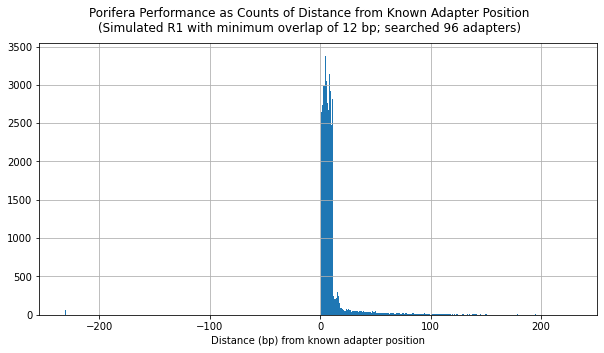

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('porifera_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Porifera Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('porifera_R1_misses.pdf')

In [18]:
!ln -fs ../demultiplexed/combined.R2.fastq ./porifera
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/adapters.R2.txt ./porifera/

!head -n 5 ./porifera/adapters.R2.txt

ACACTCTTTCCCTACACGACGCTCTTCCGATCTGTTGTGAACAACC
ACACTCTTTCCCTACACGACGCTCTTCCGATCTGCCATTAACTGTG
ACACTCTTTCCCTACACGACGCTCTTCCGATCTAGCTGTAAGCTGC
ACACTCTTTCCCTACACGACGCTCTTCCGATCTTTCGAGAAGGTCG
ACACTCTTTCCCTACACGACGCTCTTCCGATCTAGGAGTAATCAGG


In [19]:
!time python3 /Users/ryankuster/github/ngscomposer/tools/porifera.py -r1 ./porifera/combined.R2.fastq -a1 ./porifera/adapters.R2.txt -m 12 -l 0 -o ./porifera/ -m1 TGCA

python3 /Users/ryankuster/github/ngscomposer/tools/porifera.py -r1  -a1  -m 1  269.80s user 1.56s system 99% cpu 4:32.12 total


In [20]:
!python3 ../scripts/check_simulated_lengths.py ./porifera/adapted.combined.R2.fastq ./demultiplexed/combined.R2.fastq 8 porifera_R2

all reads:
count    952102.000000
mean          0.535740
std           5.371794
min        -230.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         228.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    715819
1    236283
Name: contaminated, dtype: int64

reads containing missed adapters:
0    913534
1     38568
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952098
1         4
Name: false_id, dtype: int64

misidentified reads:
count    38572.000000
mean        13.224074
std         23.334539
min       -230.000000
25%          4.000000
50%          7.000000
75%         10.000000
max        228.000000
Name: o_minus_e, dtype: float64


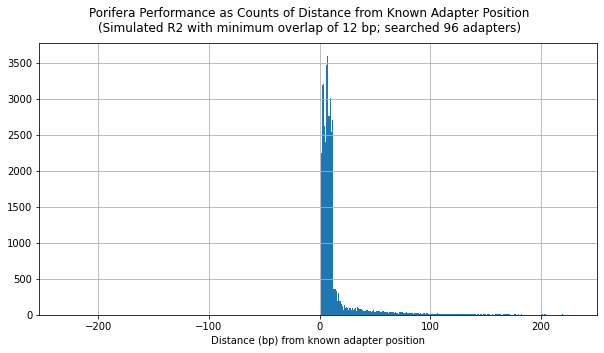

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('porifera_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Porifera Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('porifera_R2_misses.pdf')

### run adapterremoval (version 2.3.1 commit 'e5d15a7')

In [22]:
!ln -fs ../demultiplexed/combined.R1.fastq ./adapter_removal/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/adapterremoval_adapters.R1.txt ./adapter_removal/

!head -n 5 ./adapter_removal/adapterremoval_adapters.R1.txt

GGTTGTTCACAACAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
CACAGTTAATGGCAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
GCAGCTTACAGCTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
CGACCTTCTCGAAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
CCTGATTACTCCTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC


In [23]:
!time /usr/local/bin/AdapterRemoval --file1 ./adapter_removal/combined.R1.fastq --adapter-list ./adapter_removal/adapterremoval_adapters.R1.txt --minlength 0 --minadapteroverlap 12

Read 96 adapters / adapter pairs from './adapter_removal/adapterremoval_adapters.R1.txt'...
Trimming single ended reads ...
Opening FASTQ file './adapter_removal/combined.R1.fastq', line numbers start at 1
Processed a total of 952,102 reads in 4:48.8s; 3,296 reads per second on average ...
/usr/local/bin/AdapterRemoval --file1 ./adapter_removal/combined.R1.fastq      287.20s user 1.18s system 99% cpu 4:48.82 total


In [24]:
!mv your_output* ./adapter_removal/

!python3 ../scripts/check_simulated_lengths.py ./adapter_removal/your_output.truncated ./demultiplexed/combined.R1.fastq 8 adapterremoval_R1

all reads:
count    952102.000000
mean         -2.747299
std          11.170453
min        -236.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    716382
1    235720
Name: contaminated, dtype: int64

reads containing missed adapters:
0    924641
1     27461
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    790170
1    161932
Name: false_id, dtype: int64

misidentified reads:
count    189393.000000
mean        -13.811012
std          21.782568
min        -236.000000
25%         -15.000000
50%         -13.000000
75%         -12.000000
max          13.000000
Name: o_minus_e, dtype: float64


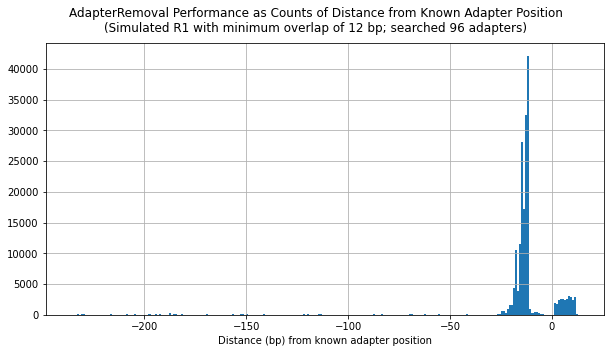

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('adapterremoval_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('AdapterRemoval Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('adapterremoval_R1_misses.pdf')

In [26]:
!ln -fs ../demultiplexed/combined.R2.fastq ./adapter_removal/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/adapterremoval_adapters.R2.txt ./adapter_removal/

!head -n 5 ./adapter_removal/adapterremoval_adapters.R2.txt

GGTTGTTCACAACAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
CACAGTTAATGGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
GCAGCTTACAGCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
CGACCTTCTCGAAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
CCTGATTACTCCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT


In [27]:
!time /usr/local/bin/AdapterRemoval --file1 ./adapter_removal/combined.R2.fastq --adapter-list ./adapter_removal/adapterremoval_adapters.R2.txt --minlength 0 --minadapteroverlap 12

Read 96 adapters / adapter pairs from './adapter_removal/adapterremoval_adapters.R2.txt'...
Trimming single ended reads ...
Opening FASTQ file './adapter_removal/combined.R2.fastq', line numbers start at 1
Processed a total of 952,102 reads in 4:46.7s; 3,320 reads per second on average ...
/usr/local/bin/AdapterRemoval --file1 ./adapter_removal/combined.R2.fastq      284.49s user 1.45s system 99% cpu 4:46.73 total


In [28]:
!mv your_output* ./adapter_removal/

!python3 ../scripts/check_simulated_lengths.py ./adapter_removal/your_output.truncated ./demultiplexed/combined.R2.fastq 8 adapterremoval_R2

all reads:
count    952102.000000
mean         -2.811242
std          11.722641
min        -236.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          90.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    715819
1    236283
Name: contaminated, dtype: int64

reads containing missed adapters:
0    925519
1     26583
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    791673
1    160429
Name: false_id, dtype: int64

misidentified reads:
count    187012.000000
mean        -14.312392
std          23.130447
min        -236.000000
25%         -15.000000
50%         -13.000000
75%         -12.000000
max          90.000000
Name: o_minus_e, dtype: float64


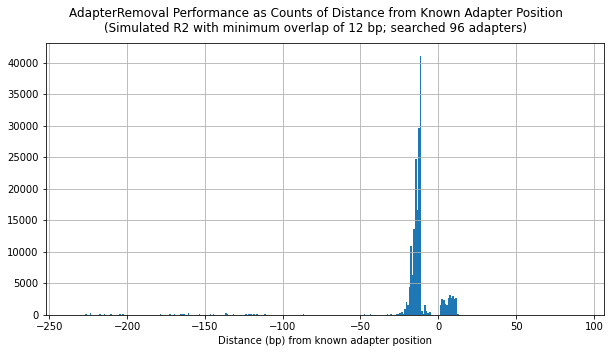

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('adapterremoval_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('AdapterRemoval Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('adapterremoval_R2_misses.pdf')

### run skewer (version 0.2.2 commit '978e8e4')

In [30]:
!ln -fs ../demultiplexed/combined.R1.fastq ./skewer/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/skewer_adapters.R1.fasta ./skewer/

!head -n 5 ./skewer/skewer_adapters.R1.fasta

>
GGTTGTTCACAACAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
>
CACAGTTAATGGCAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
>


In [31]:
!time /usr/local/bin/skewer -l 0 -k 12 -x ./skewer/skewer_adapters.R1.fasta ./skewer/combined.R1.fastq

.--. .-.
: .--': :.-.
`. `. : `'.' .--. .-..-..-. .--. .--.
_`, :: . `.' '_.': `; `; :' '_.': ..'
`.__.':_;:_;`.__.'`.__.__.'`.__.':_;
skewer v0.2.2 [April 4, 2016]
Parameters used:
-- 3' end adapter sequences in file (-x):	./skewer/skewer_adapters.R1.fasta
01x:	GGTTGTTCACAACAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
02x:	CACAGTTAATGGCAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
03x:	GCAGCTTACAGCTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
04x:	CGACCTTCTCGAAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
05x:	CCTGATTACTCCTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
06x:	GTATCCTGAGGTAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
07x:	GTCATTGGCATCAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
08x:	CAGAATGGAGTGAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
09x:	CAACCAGTACCAGAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
10x:	CTGGAAGACTTGGAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
11x:	CTTGATCCGTCTTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
12x:	CATAAGCCGACTAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
13x:	GAATTCCAAGCCAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
14x:	CATCGACAGGACTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC


In [32]:
!python3 ../scripts/check_simulated_lengths.py ./skewer/combined.R1-trimmed.fastq ./demultiplexed/combined.R1.fastq 8 skewer_R1

all reads:
count    952102.000000
mean          0.201141
std           1.241762
min         -12.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         128.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    716382
1    235720
Name: contaminated, dtype: int64

reads containing missed adapters:
0    920338
1     31764
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952097
1         5
Name: false_id, dtype: int64

misidentified reads:
count    31769.000000
mean         6.028109
std          3.329706
min        -12.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        128.000000
Name: o_minus_e, dtype: float64


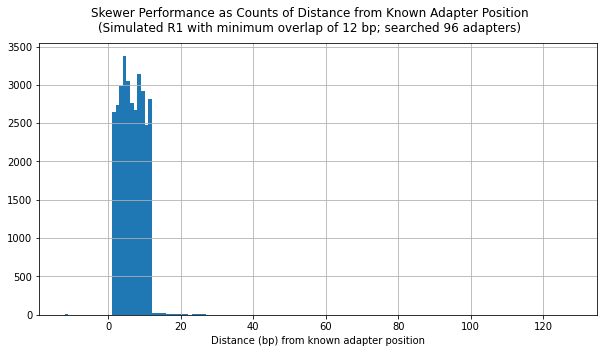

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('skewer_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Skewer Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('skewer_R1_misses.pdf')

In [34]:
!ln -fs ../demultiplexed/combined.R2.fastq ./skewer/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/skewer_adapters.R2.fasta ./skewer/

!head -n 5 ./skewer/skewer_adapters.R2.fasta

>
GGTTGTTCACAACAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
>
CACAGTTAATGGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
>


In [35]:
!time /usr/local/bin/skewer -l 0 -k 12 -x ./skewer/skewer_adapters.R2.fasta ./skewer/combined.R2.fastq

.--. .-.
: .--': :.-.
`. `. : `'.' .--. .-..-..-. .--. .--.
_`, :: . `.' '_.': `; `; :' '_.': ..'
`.__.':_;:_;`.__.'`.__.__.'`.__.':_;
skewer v0.2.2 [April 4, 2016]
Parameters used:
-- 3' end adapter sequences in file (-x):	./skewer/skewer_adapters.R2.fasta
01x:	GGTTGTTCACAACAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
02x:	CACAGTTAATGGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
03x:	GCAGCTTACAGCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
04x:	CGACCTTCTCGAAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
05x:	CCTGATTACTCCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
06x:	GTATCCTGAGGTAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
07x:	GTCATTGGCATCAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
08x:	CAGAATGGAGTGAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
09x:	CAACCAGTACCAGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
10x:	CTGGAAGACTTGGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
11x:	CTTGATCCGTCTTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
12x:	CATAAGCCGACTAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
13x:	GAATTCCAAGCCAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
14x:	CATCGACAGGACTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
15x:	CCAAGACTA

In [36]:
!python3 ../scripts/check_simulated_lengths.py ./skewer/combined.R2-trimmed.fastq ./demultiplexed/combined.R2.fastq 8 skewer_R2

all reads:
count    952102.000000
mean          0.205440
std           1.305834
min         -18.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         151.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    715819
1    236283
Name: contaminated, dtype: int64

reads containing missed adapters:
0    920048
1     32054
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    951995
1       107
Name: false_id, dtype: int64

misidentified reads:
count    32161.000000
mean         6.081900
std          3.839481
min        -18.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        151.000000
Name: o_minus_e, dtype: float64


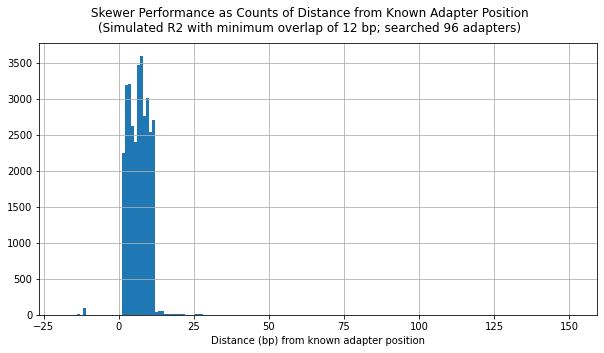

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('skewer_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Skewer Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('skewer_R2_misses.pdf')

### run cutadapt (version 3.1 commit 'b47e1fa')

In [38]:
!ln -fs ../demultiplexed/combined.R1.fastq ./cutadapt/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/cutadapt_adapters.R1.sh ./cutadapt/

!head -n 5 ./cutadapt/cutadapt_adapters.R1.sh
!echo '...'
!tail -n 5 ./cutadapt/cutadapt_adapters.R1.sh

/usr/local/bin/cutadapt --minimum-length 0 \
-a "GGTTGTTCACAACAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
-a "CACAGTTAATGGCAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
-a "GCAGCTTACAGCTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
-a "CGACCTTCTCGAAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
...
-a "GTCTCTACACAAGTGGAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
-a "CTGTGTCGTACAGTTGAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
-a "CTGTCAGTCAAGCAGAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
-a "CTGTGGCACACAGACTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
-o ./cutadapt/cutadapt_combined.R1.fastq ./cutadapt/combined.R1.fastq


In [39]:
!time bash ./cutadapt/cutadapt_adapters.R1.sh

This is cutadapt 3.1 with Python 3.8.6
Command line parameters: --minimum-length 0 -a GGTTGTTCACAACAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CACAGTTAATGGCAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a GCAGCTTACAGCTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CGACCTTCTCGAAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CCTGATTACTCCTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a GTATCCTGAGGTAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a GTCATTGGCATCAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CAGAATGGAGTGAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CAACCAGTACCAGAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CTGGAAGACTTGGAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CTTGATCCGTCTTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CATAAGCCGACTAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a GAATTCCAAGCCAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -a CATCGACAGGACTAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_over

Sequence: GATTGGCAGTCGTAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC; Type: regular 3'; Length: 48; Trimmed: 0 times

=== Adapter 44 ===

Sequence: CTACTCCATCCGTAAGATCGGAAGAGCACACGTCTGAACTCCAGTCAC; Type: regular 3'; Length: 48; Trimmed: 1648 times

No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-29 bp: 2; 30-39 bp: 3; 40-48 bp: 4

Bases preceding removed adapters:
  A: 0.1%
  C: 0.1%
  G: 99.6%
  T: 0.2%
  none/other: 0.1%
    The adapter is preceded by "G" extremely often.
    The provided adapter sequence could be incomplete at its 5' end.

Overview of removed sequences
length	count	expect	max.err	error counts
13	55	0.0	1	52 3
16	57	0.0	1	49 8
17	56	0.0	1	51 5
19	48	0.0	1	42 6
24	56	0.0	2	50 5 1
29	81	0.0	2	70 9 2
31	63	0.0	3	54 8 1
33	45	0.0	3	37 7 1
34	45	0.0	3	36 5 4
39	45	0.0	3	36 4 5
46	50	0.0	4	41 6 2 0 1
54	37	0.0	4	30 5 1 1
55	23	0.0	4	16 6 0 1
56	41	0.0	4	36 2 2 1
59	29	0.0	4	22 3 3 1
64	42	0.0	4	37 5
68	40	0.0	4	35 5
74	17	0.0	4	15 2
77	22	0.0	4	20 2
81	43	0.0	4	36 3 1 1 2
82	22	0.

In [40]:
!python3 ../scripts/check_simulated_lengths.py ./cutadapt/cutadapt_combined.R1.fastq ./demultiplexed/combined.R1.fastq 8 cutadapt_R1

all reads:
count    952102.000000
mean          0.174703
std           1.429585
min         -14.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         199.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    716382
1    235720
Name: contaminated, dtype: int64

reads containing missed adapters:
0    922694
1     29408
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    951458
1       644
Name: false_id, dtype: int64

misidentified reads:
count    30052.000000
mean         5.534906
std          5.922959
min        -14.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        199.000000
Name: o_minus_e, dtype: float64


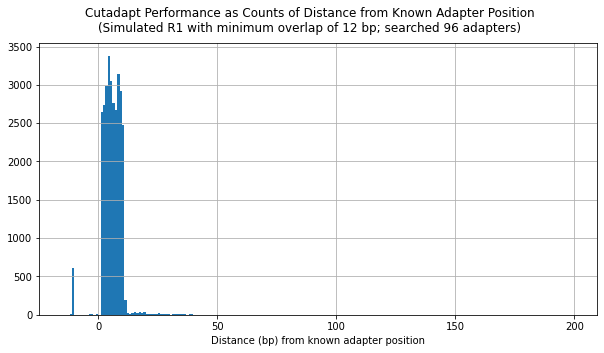

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cutadapt_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Cutadapt Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('cutadapt_R1_misses.pdf')

In [42]:
!ln -fs ../demultiplexed/combined.R2.fastq ./cutadapt/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/cutadapt_adapters.R2.sh ./cutadapt/

!head -n 5 ./cutadapt/cutadapt_adapters.R2.sh
!echo '...'
!tail -n 5 ./cutadapt/cutadapt_adapters.R2.sh

/usr/local/bin/cutadapt --minimum-length 0 \
-a "GGTTGTTCACAACAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12" \
-a "CACAGTTAATGGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12" \
-a "GCAGCTTACAGCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12" \
-a "CGACCTTCTCGAAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12" \
...
-a "GTCTCTACACAAGTGGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12" \
-a "CTGTGTCGTACAGTTGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12" \
-a "CTGTCAGTCAAGCAGAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12" \
-a "CTGTGGCACACAGACTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12" \
-o ./cutadapt/cutadapt_combined.R2.fastq ./cutadapt/combined.R2.fastq


In [43]:
!time bash ./cutadapt/cutadapt_adapters.R2.sh

This is cutadapt 3.1 with Python 3.8.6
Command line parameters: --minimum-length 0 -a GGTTGTTCACAACAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CACAGTTAATGGCAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a GCAGCTTACAGCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CGACCTTCTCGAAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CCTGATTACTCCTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a GTATCCTGAGGTAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a GTCATTGGCATCAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CAGAATGGAGTGAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CAACCAGTACCAGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CTGGAAGACTTGGAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CTTGATCCGTCTTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CATAAGCCGACTAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a GAATTCCAAGCCAAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CATCGACAGGACTAGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -a CCAA

Overview of removed sequences
length	count	expect	max.err	error counts
12	70	0.1	1	67 3
14	86	0.0	1	80 6
15	114	0.0	1	101 13
18	66	0.0	1	53 13
22	49	0.0	2	41 6 2
23	119	0.0	2	95 21 3
24	117	0.0	2	99 14 4
25	54	0.0	2	42 10 2
26	61	0.0	2	43 17 1
27	48	0.0	2	35 11 2
29	116	0.0	2	99 11 6
30	41	0.0	3	36 5
33	84	0.0	3	69 10 3 2
35	30	0.0	3	26 3 1
36	26	0.0	3	21 4 1
38	51	0.0	3	39 8 2 2
39	41	0.0	3	29 10 2
40	85	0.0	4	62 19 3 1
41	112	0.0	4	80 19 8 5
45	44	0.0	4	28 10 4 2
47	48	0.0	4	30 13 4 1
51	44	0.0	4	33 9 1 1
55	29	0.0	4	21 7 1
58	40	0.0	4	32 7 1
61	26	0.0	4	19 5 2
65	31	0.0	4	20 6 4 1
66	30	0.0	4	24 4 0 1 1
68	37	0.0	4	30 6 1
70	63	0.0	4	46 14 1 1 1
72	22	0.0	4	15 3 3 1
73	20	0.0	4	19 1
74	46	0.0	4	38 6 1 1
76	14	0.0	4	13 1
78	44	0.0	4	35 7 1 0 1
80	28	0.0	4	22 5 1
82	56	0.0	4	47 6 2 1
86	24	0.0	4	17 4 3
88	45	0.0	4	33 10 2
90	16	0.0	4	12 2 1 1
91	15	0.0	4	11 2 0 2
93	19	0.0	4	14 4 1
95	30	0.0	4	25 5
100	15	0.0	4	13 0 2
102	18	0.0	4	13 3 2
103	15	0.0	4	14 0 1
105	12	0.0	4	10 1 1
106	34	

In [44]:
!python3 ../scripts/check_simulated_lengths.py ./cutadapt/cutadapt_combined.R2.fastq ./demultiplexed/combined.R2.fastq 8 cutadapt_R2

all reads:
count    952102.000000
mean          0.192992
std           1.745040
min         -16.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         227.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    715819
1    236283
Name: contaminated, dtype: int64

reads containing missed adapters:
0    922050
1     30052
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    951413
1       689
Name: false_id, dtype: int64

misidentified reads:
count    30741.000000
mean         5.977294
std          7.729255
min        -16.000000
25%          3.000000
50%          6.000000
75%          8.000000
max        227.000000
Name: o_minus_e, dtype: float64


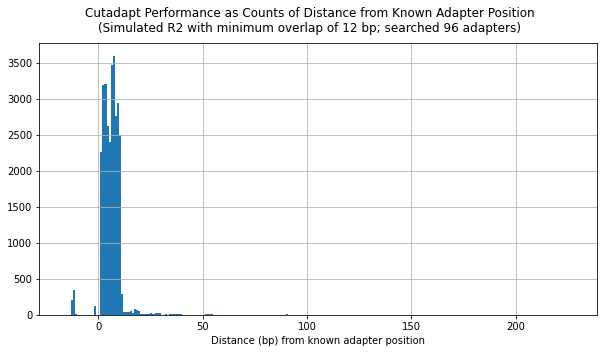

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cutadapt_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Cutadapt Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; searched 96 adapters)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('cutadapt_R2_misses.pdf')